<a href="https://colab.research.google.com/github/lagom-QB/M11/blob/master/Practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keywords: modules, optimizers, dense layer


# High level concepts

## Modules

Modules helps organizing and composing functions and inputs (weights) together.

In [0]:
from torch import nn
from torch.nn import init
from torch.nn.modules import loss
import torch

Some examples:

In [2]:
linear = nn.Linear(10, 10)
linear

Linear(in_features=10, out_features=10, bias=True)

In [3]:
linear(torch.tensor([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,0.0]))

tensor([-1.6963,  1.5029, -0.8684,  3.1083,  4.5538, -0.9848, -0.6275, -1.8187,
         5.8677,  2.1064], grad_fn=<AddBackward0>)

In [10]:
relu = nn.ReLU()
relu


ReLU()

In [11]:
x = torch.tensor([-1.0])
relu(x)

tensor([0.])

In [12]:
tanh = nn.Tanh()
tanh

Tanh()

In [13]:
dropout = nn.Dropout(0.45, inplace=True)
dropout

Dropout(p=0.45, inplace=True)

In [14]:
sequential = nn.Sequential(nn.Linear(10, 100), nn.Tanh(), nn.Linear(100,100), nn.Dropout(0.4, inplace = True), nn.Linear(100,10))
sequential

Sequential(
  (0): Linear(in_features=10, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Dropout(p=0.4, inplace=True)
  (4): Linear(in_features=100, out_features=10, bias=True)
)

In [15]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(10,100)
        self.act1 = nn.Tanh()
        self.lin2 = nn.Linear(100,100)
        self.lin3 = nn.Linear(100,100)
        self.lin4 = nn.Linear(100,10)
        
    def forward(self, x):
        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        x = self.act1(x)
        x = self.lin3(x)
        x = self.act1(x)
        x = self.lin4(x)
        return x
net = Net()
net


Net(
  (lin1): Linear(in_features=10, out_features=100, bias=True)
  (act1): Tanh()
  (lin2): Linear(in_features=100, out_features=100, bias=True)
  (lin3): Linear(in_features=100, out_features=100, bias=True)
  (lin4): Linear(in_features=100, out_features=10, bias=True)
)

In [16]:
cross_entropy = loss.CrossEntropyLoss()
cross_entropy


CrossEntropyLoss()

In [0]:
from torch.nn import Module

In [0]:
from torch.nn import Parameter

In [0]:
class Power(Module):

    __constants__ = ['exponent']

    def __init__(self, exponent=3):
        super().__init__()
        self.exponent = exponent

    def forward(self, input):
        return torch.pow(input, self.exponent)

    def extra_repr(self):
        return f'exponent={self.exponent}'

In [20]:
Power(exponent = 4)



Power(exponent=4)

In [0]:
class WPower(Module):    
    def __init__(self, ):
        super().__init__()
        self.exponent = Parameter(torch.Tensor(1))
        self.reset_parameters()

    def reset_parameters(self):
        init.uniform_(self.exponent, a=math.sqrt(5))

    def forward(self, input):
        return torch.pow(input, self.exponent)


## Parameters

Some models are not just functions, but they also have internal parameters (weights/graph inputs).

In [22]:
list(linear.parameters())


[Parameter containing:
 tensor([[-0.0027, -0.2211, -0.2735, -0.0491,  0.2319, -0.2681, -0.2732,  0.2109,
           0.0271, -0.2290],
         [ 0.2957, -0.1693, -0.0366, -0.2077,  0.2994,  0.0644,  0.0490, -0.3114,
           0.2942, -0.2810],
         [ 0.1992, -0.2892,  0.0674,  0.0507,  0.1135, -0.2438,  0.0013,  0.2407,
          -0.2101,  0.1690],
         [ 0.0726, -0.1074,  0.2681, -0.1294,  0.1598,  0.2365,  0.2077,  0.2524,
          -0.2919,  0.0020],
         [-0.2195,  0.1777,  0.2155, -0.1588,  0.0353,  0.3071,  0.1882,  0.2432,
          -0.0661,  0.0005],
         [ 0.0677,  0.0386, -0.1665,  0.3045, -0.1042,  0.1134,  0.0949, -0.1904,
          -0.1467, -0.2724],
         [-0.2064,  0.2832,  0.0202,  0.1638, -0.2312,  0.0429, -0.0152,  0.0761,
          -0.1280, -0.2837],
         [ 0.1916,  0.1903,  0.2784,  0.1428,  0.0864,  0.1358, -0.1625, -0.3057,
          -0.1806,  0.1590],
         [ 0.0733,  0.1437, -0.1913, -0.2587, -0.0312,  0.1236,  0.2719,  0.2633,
       

In [23]:
linear.weight


Parameter containing:
tensor([[-0.0027, -0.2211, -0.2735, -0.0491,  0.2319, -0.2681, -0.2732,  0.2109,
          0.0271, -0.2290],
        [ 0.2957, -0.1693, -0.0366, -0.2077,  0.2994,  0.0644,  0.0490, -0.3114,
          0.2942, -0.2810],
        [ 0.1992, -0.2892,  0.0674,  0.0507,  0.1135, -0.2438,  0.0013,  0.2407,
         -0.2101,  0.1690],
        [ 0.0726, -0.1074,  0.2681, -0.1294,  0.1598,  0.2365,  0.2077,  0.2524,
         -0.2919,  0.0020],
        [-0.2195,  0.1777,  0.2155, -0.1588,  0.0353,  0.3071,  0.1882,  0.2432,
         -0.0661,  0.0005],
        [ 0.0677,  0.0386, -0.1665,  0.3045, -0.1042,  0.1134,  0.0949, -0.1904,
         -0.1467, -0.2724],
        [-0.2064,  0.2832,  0.0202,  0.1638, -0.2312,  0.0429, -0.0152,  0.0761,
         -0.1280, -0.2837],
        [ 0.1916,  0.1903,  0.2784,  0.1428,  0.0864,  0.1358, -0.1625, -0.3057,
         -0.1806,  0.1590],
        [ 0.0733,  0.1437, -0.1913, -0.2587, -0.0312,  0.1236,  0.2719,  0.2633,
          0.2628, -0.1769

In [24]:
linear.bias


Parameter containing:
tensor([ 0.1966,  0.1032, -0.0421, -0.1005, -0.2809,  0.1715, -0.1555,  0.1645,
         0.1554, -0.2582], requires_grad=True)

In [25]:
list(tanh.parameters())


[]

In [26]:
list(dropout.parameters())


[]

In [27]:
dropout.p 

0.45

In [28]:
list(cross_entropy.parameters())


[]

In [29]:
list(map(lambda x: x.shape, list(sequential.parameters())))


[torch.Size([100, 10]),
 torch.Size([100]),
 torch.Size([100, 100]),
 torch.Size([100]),
 torch.Size([10, 100]),
 torch.Size([10])]

In [30]:
list(map(lambda x: x.shape, list(net.parameters())))


[torch.Size([100, 10]),
 torch.Size([100]),
 torch.Size([100, 100]),
 torch.Size([100]),
 torch.Size([100, 100]),
 torch.Size([100]),
 torch.Size([10, 100]),
 torch.Size([10])]

In [31]:
list(map(lambda x: x.requires_grad, list(net.parameters())))


[True, True, True, True, True, True, True, True]

## Eval

Each module can be in either `eval` or `train` state.

In [32]:
dropout.train()


Dropout(p=0.45, inplace=True)

In [33]:
dropout(torch.ones(10))


tensor([0.0000, 0.0000, 0.0000, 0.0000, 1.8182, 0.0000, 1.8182, 0.0000, 1.8182,
        1.8182])

In [34]:
dropout.eval()


Dropout(p=0.45, inplace=True)

In [35]:
newseq = nn.Sequential(nn.Dropout(), nn.Dropout())
newseq(torch.ones(10))


tensor([0., 0., 4., 0., 0., 4., 0., 0., 0., 0.])

In [36]:
newseq.eval()
newseq(torch.ones(10))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Important**! Train / eval mode has nothing to do with weight training. It just changes behaviour of some modules (i.e. `dropout`, `batchnorm`). For composite modules `.eval()`/`.train()` sets corresponding mode for each of its components.

## Initialization

Most of module have default way of parameter initialization, but sometimes we might want to init them explicitly.

In [37]:
linear.weight

Parameter containing:
tensor([[-0.0027, -0.2211, -0.2735, -0.0491,  0.2319, -0.2681, -0.2732,  0.2109,
          0.0271, -0.2290],
        [ 0.2957, -0.1693, -0.0366, -0.2077,  0.2994,  0.0644,  0.0490, -0.3114,
          0.2942, -0.2810],
        [ 0.1992, -0.2892,  0.0674,  0.0507,  0.1135, -0.2438,  0.0013,  0.2407,
         -0.2101,  0.1690],
        [ 0.0726, -0.1074,  0.2681, -0.1294,  0.1598,  0.2365,  0.2077,  0.2524,
         -0.2919,  0.0020],
        [-0.2195,  0.1777,  0.2155, -0.1588,  0.0353,  0.3071,  0.1882,  0.2432,
         -0.0661,  0.0005],
        [ 0.0677,  0.0386, -0.1665,  0.3045, -0.1042,  0.1134,  0.0949, -0.1904,
         -0.1467, -0.2724],
        [-0.2064,  0.2832,  0.0202,  0.1638, -0.2312,  0.0429, -0.0152,  0.0761,
         -0.1280, -0.2837],
        [ 0.1916,  0.1903,  0.2784,  0.1428,  0.0864,  0.1358, -0.1625, -0.3057,
         -0.1806,  0.1590],
        [ 0.0733,  0.1437, -0.1913, -0.2587, -0.0312,  0.1236,  0.2719,  0.2633,
          0.2628, -0.1769

In [38]:
init.xavier_uniform_(linear.weight)


Parameter containing:
tensor([[ 0.4791,  0.3153, -0.2981,  0.4577,  0.0855, -0.4668, -0.3250,  0.2268,
          0.0335, -0.1580],
        [ 0.3158, -0.5197,  0.2526, -0.0163, -0.1385, -0.5269, -0.1296, -0.2408,
         -0.0605,  0.4791],
        [ 0.1861,  0.3523,  0.3250,  0.0771, -0.2959,  0.4437, -0.3315, -0.0956,
         -0.1429, -0.4993],
        [-0.0592, -0.0019,  0.3306, -0.0563, -0.4209,  0.3499,  0.5453, -0.1047,
         -0.5163,  0.2789],
        [ 0.1696,  0.3643,  0.4865, -0.4270, -0.2468,  0.2677,  0.2060,  0.3171,
          0.1841, -0.1748],
        [-0.4786, -0.2658, -0.4344,  0.5344, -0.1596, -0.2098,  0.4759,  0.5139,
          0.5280, -0.1852],
        [ 0.3429,  0.1368, -0.1375,  0.0058,  0.4810,  0.2855,  0.1015, -0.3473,
         -0.2691,  0.0286],
        [ 0.0411, -0.5433,  0.0348,  0.2818,  0.4250, -0.4068,  0.0112, -0.2955,
          0.1399, -0.0260],
        [-0.3189,  0.4794,  0.2225, -0.5079, -0.2746, -0.4354, -0.4586,  0.4850,
          0.2630,  0.4807

In [39]:
init.constant_(linear.weight, 1.0)


Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

In [40]:
list(linear.parameters())


[Parameter containing:
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1966,  0.1032, -0.0421, -0.1005, -0.2809,  0.1715, -0.1555,  0.1645,
          0.1554, -0.2582], requires_grad=True)]

In [41]:
for param in linear.parameters():
    init.uniform_(param, -12, 12)
list(linear.parameters())

[Parameter containing:
 tensor([[ -0.0693,   4.0672,  -9.7008,   5.6510, -11.4066,  -6.3090, -11.0726,
            3.8310, -10.2759,   6.3835],
         [  5.1474,   2.8737,  -6.2926,   0.0378,   2.2584, -10.2943,   6.6297,
            7.7498,  -5.3114,  11.5358],
         [ -6.4542,  -4.9942,  -9.8922,  -3.3351,   2.9393,   9.9581,  -4.6675,
           -4.8261,  -4.7029,   1.0023],
         [  3.5115,  -7.2074,   4.1617,   9.1712,  -0.9573,  -6.2061,   4.7461,
            3.1043,  -2.0520,  -3.8580],
         [-11.4583,  -7.8245,   1.5411,  -8.5157,  10.7574,  -1.1466,  -3.6018,
           -4.6622,   7.4345,  10.9662],
         [  8.6711,  -0.4452,  -6.0770,  -3.1184,  -6.7547,   2.2255,   6.0005,
            2.5647,   7.9769,  -3.1634],
         [  4.3004,  11.5693,  -1.2766,   0.2349,   0.9411,  -1.6166,   6.6567,
           -7.2181,   8.3802,   0.2843],
         [ -3.1749,   8.8571,  -7.3255,  -8.5279,   2.8075,  11.5442,  -7.8383,
            6.0542,   2.0503,  10.3908],
         

You can find more initialization functions here: https://pytorch.org/docs/master/nn.html#torch-nn-init.

## Optimizers

Torch has a reach collection of optimizers built-in.

In [0]:
import torch.optim as optim

In [0]:
x = torch.tensor([1.0], requires_grad = True)

In [0]:
sgd = optim.SGD([x], lr=0.1)

In [0]:
y = x * 2


In [0]:
y.backward()

In [47]:
x.grad

tensor([2.])

In [0]:
sgd.step()

In [49]:
x

tensor([0.8000], requires_grad=True)

In [50]:
x.grad


tensor([2.])

In [0]:
sgd.zero_grad()


In [52]:
x.grad


tensor([0.])

# First Training Loop

In [0]:
from torchvision import datasets, transforms

Let's downlad MNIST --- dataset of handwritten digits.

In [0]:
train_dataset = datasets.MNIST('/data', train=True, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                ]))


In [0]:
test_dataset = datasets.MNIST('../data', train=False, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                ]))

Dataloaders are responsible for data loading. They help us to split dataset in batches and shuffles the dataset(otherwise each buch will have only variants of a single digit). We will look inside them later.

In [0]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [0]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
toPIL = transforms.ToPILImage()

In [0]:
def example(i):
    print(train_dataset[i][1])
    return toPIL(train_dataset[i][0]).resize((256, 256))

4


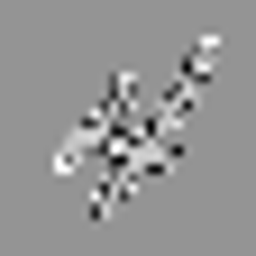

In [89]:
example(9)

3


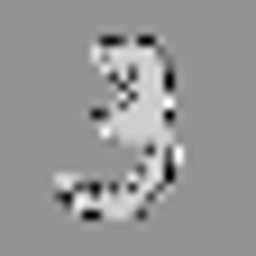

In [59]:
example(10)


In [60]:
train_loader.__iter__().__next__()[1]


tensor([9, 9, 6, 9, 0, 5, 3, 6, 9, 1, 3, 8, 0, 6, 8, 9, 3, 3, 4, 5, 6, 5, 5, 7,
        8, 2, 6, 0, 8, 9, 3, 4, 0, 0, 9, 4, 6, 0, 8, 7, 3, 6, 2, 7, 9, 7, 5, 3,
        6, 1, 4, 3, 8, 8, 2, 1, 1, 3, 8, 0, 1, 3, 8, 2])

In [61]:
train_loader.__iter__().__next__()[0].shape


torch.Size([64, 1, 28, 28])

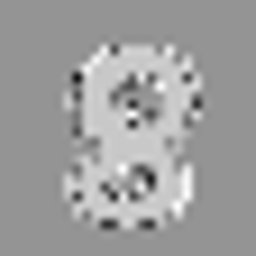

In [62]:
toPIL(train_loader.__iter__().__next__()[0][0]).resize((256,256))

Let's write a simple helper module.

In [0]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        batch_size = x.shape[0]
        return x.view(batch_size, -1)


In [0]:
model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
for param in model.parameters():
    init.uniform_(param, -0.1, 0.1)

Why do we need `Flatten` module?

Setup an optimizer:


In [0]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

Choose a loss function:

In [0]:
loss_function = loss.CrossEntropyLoss()


And start training:

In [0]:
def train(model, train_loader, optimizer, loss_function, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [0]:
def test(model, test_loader, loss_function):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += loss_function(output, target).sum().item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [73]:
 %%time
 for epoch in range(1, 100):
        train(model, train_loader, optimizer, loss_function, epoch)
        test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.000208
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.000162
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.000132
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.000218
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.000085

Test set: Average loss: 0.0012, Accuracy: 9821/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.000158
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.000074
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.000075
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.000118
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.000139

Test set: Average loss: 0.0012, Accuracy: 9823/10000 (98%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.000123
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.000091
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.000121
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.000175
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.000051

Test set: Average loss: 0.0012, Accuracy: 9821/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.000028
Train Epoch: 4 [12800/60000 (21%)]	Lo

# Assignment

## Due to 10AM, 20.05.2020

## 1. MNIST playground [10]

9


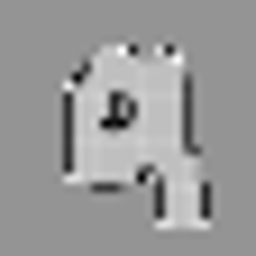

In [104]:
#2 
# example(4321) #The 0 looks like a 6 to me
# example(600) #The nine looks like a 1 to me
# example(4542) #Is that a 2?
# example(56742) #This 9 is a joke

**Important!** This task is not too hard, but it is pretty time-consuming. Total computation time is about 4 hours.

1. Find out how many epochs are needed for our network to stop improving on test dataset (let's stop on 5 epochs without accuracy improvement on the test set). How long does it take? [1]
2. Find some problematic examples and show them with `example()` function we defined in class.[1]
3. Draw a confusion matrix for your model on test dataset. It is a 10x10 matrix, and in the cell `(i,j)` there is a number of digits `i` classified as digit `j`.[1]
4. By default weight of linear layer is initialized with `kaiming_uniform` function and bias is unitialized with `uniform` function (see reset parameters method of Linear class https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py). Initialize all weights as `uniform(-0.1,0.1)` and test. How does this modification affect training process? Is it faster/slower? Is the end result better/worse? Same question form `uniform(-1, 1)`. Same question for `constant(0)` initialization. Don't forget to recreate optimizer for your new model (otherwise you'll optimize parameters of the old model using values from the new one, which does not work).[1]
5. Try replacing `Tanh` activation by `Sigmoid` test, how does this modification affect training process? These and further questions assumes that you are changing the initial model (i.e. all modification from previous step are undone). [1]
6. Try changing output dimension of the first linear layer  (and input of the second) to `256`, to `1024`. How does this modification affect training process? How does the number of model parameters changes? [1]
7. Our model has 2 hidden layers of sizes `512` and `64`. Let's use 3 hidden layers of sizes `512`, `256` and `64`.  How does this modification affect training process? How does the number of model parameters changes? Same question for 3 layers of sizes `512`, `5` and `64`(don't forget to add activation function between linear layers). [1]
8. Try adding dropout after first/second layer. How does this modification affect training process? [1]
9. Try disabling shuffle in the train dataloader (leave it unchanged in the test dataloader, otherwise testing will not be fair). How does this modification affect training process? Do not forget to reset training weights of the model. [1]
10. Try training, using half of the training dataset. 30%. 10%. How does this affect training process? Do not forget to reset training weights of the model. [1] 

